<a href="https://colab.research.google.com/github/hernandosalas/Code/blob/master/Machine%20Learning/Portfolio_Research_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

In [ ]:
def getdata(stock):
  output = []
  add = "9ed154fca9564335c2e742942948e14d"
  # Company Quote Group of Items
  company_quote = requests.get(f"https://financialmodelingprep.com/api/v3/company/profile/{stock}?apikey={add}")
  company_quote = company_quote.json()
  share_price = float("{0:.2f}".format(company_quote['profile']['price']))

  # Balance Sheet Group of Items    
  BS = requests.get(f"https://financialmodelingprep.com/api/v3/financials/balance-sheet-statement/{stock}?period=quarter&apikey={add}")
  BS = BS.json()

  #Total Debt
  debt = float("{0:.2f}".format(float(BS['financials'][0]['Total debt'])/10**9))

  #Total Cash
  cash = float("{0:.2f}".format(float(BS['financials'][0]['Cash and short-term investments'])/10**9))

  # Income Statement Group of Items
  IS = requests.get(f"https://financialmodelingprep.com/api/v3/financials/income-statement/{stock}?period=quarter&apikey={add}")
  IS = IS.json()

  # Most Recent Quarterly Revenue
  qRev = float("{0:.2f}".format(float(IS['financials'][0]['Revenue'])/10**9))

  # Company Profile Group of Items
  company_info = requests.get(f"https://financialmodelingprep.com/api/v3/company/profile/{stock}?apikey={add}")
  company_info = company_info.json()

  # Chief Executive Officer
  ceo = company_info['profile']['ceo']

  output = {'Symbol':stock,'Total Cash':cash,'Total Debt':debt,'Q3 2019 Revenue':qRev,'CEO':ceo}

  return output

tickers = ['AAPL', 'MSFT', 'GOOG', 'T', 'CSCO', 'INTC', 'ORCL', 'AMZN', 'FB', 'TSLA', 'NVDA']

df = pd.DataFrame([],
     columns=['Symbol','Total Cash', 'Total Debt', 'Q3 2019 Revenue', 'CEO'])

for ticker in tickers:
    df = df.append(getdata(ticker),ignore_index=True)
print(df)


    
# data = map(getdata, tickers)


   Symbol  Total Cash  Total Debt  Q3 2019 Revenue                         CEO
0    AAPL       94.05       99.48            58.31         Mr. Timothy D. Cook
1    MSFT      137.63       66.61            35.02           Mr. Satya Nadella
2    GOOG      117.23        5.37            41.16           Mr. Sundar Pichai
3       T        9.96      164.27            42.78   Mr. Randall L. Stephenson
4    CSCO       28.57       16.08            11.98      Mr. Charles H. Robbins
5    INTC       12.68       39.92            19.83          Mr. Robert H. Swan
6    ORCL       43.06       71.60            10.44          Ms. Safra Ada Catz
7    AMZN       49.29       23.44            75.45        Mr. Jeffrey P. Bezos
8      FB       60.29       10.34            17.74  Mr. Mark Elliot Zuckerberg
9    TSLA        8.08        1.20             5.99            Mr. Elon R. Musk
10   NVDA       16.35        0.52             3.08          Mr. Jen-Hsun Huang


In [5]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 11)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,298.282715
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,296.879883
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,301.655548
2020-01-09,310.429993,306.200012,307.239990,309.630005,42527100.0,308.062988
2020-01-10,312.670013,308.250000,310.600006,310.329987,35161200.0,308.759399


Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2020-01-06    242.561192
2020-01-07    243.518790
2020-01-08    244.534164
2020-01-09    245.566394
2020-01-10    246.567398
Name: Adj Close, Length: 2523, dtype: float64


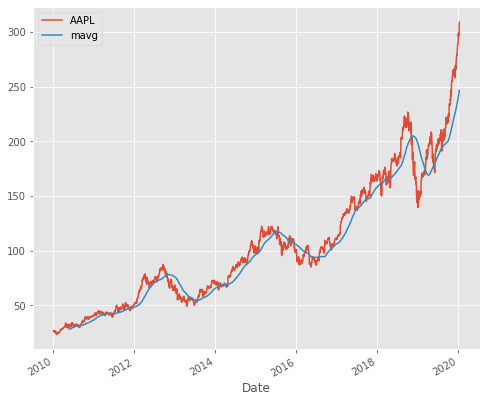

In [6]:
# Rolling Mean
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
print(mavg)

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

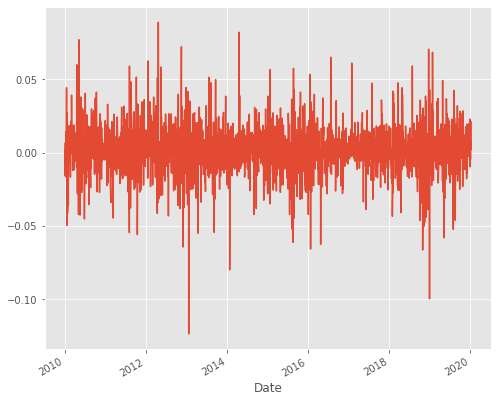

In [7]:
# Return Deviation — to determine risk and return
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')


In [13]:
# Analysing your Competitors Stocks
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=datetime.datetime(2020, 1, 1),end=datetime.datetime(2020, 4, 1))['Adj Close']
print(dfcomp)

Symbols           AAPL         GE         GOOG         IBM        MSFT
Date                                                                  
2020-01-02  298.829956  11.900323  1367.369995  132.246933  159.737595
2020-01-03  295.924713  11.940224  1360.660034  131.192245  157.748581
2020-01-06  298.282715  12.109800  1394.209961  130.957886  158.156342
2020-01-07  296.879883  12.020024  1393.339966  131.045761  156.714310
2020-01-08  301.655548  11.910297  1404.319946  132.139526  159.210495
...                ...        ...          ...         ...         ...
2020-03-26  257.742310   8.107844  1161.750000  111.396042  155.676437
2020-03-27  247.071182   7.608593  1110.709961  106.600357  149.284225
2020-03-30  254.122101   7.878188  1146.819946  111.435516  159.784988
2020-03-31  253.603500   7.928113  1162.810059  109.461983  157.271988
2020-04-01  240.259628   7.029461  1105.619995  103.748604  151.687546

[63 rows x 5 columns]


Symbols      AAPL        GE      GOOG       IBM      MSFT
Symbols                                                  
AAPL     1.000000  0.822640  0.916783  0.827360  0.936215
GE       0.822640  1.000000  0.797406  0.773103  0.807286
GOOG     0.916783  0.797406  1.000000  0.825320  0.928094
IBM      0.827360  0.773103  0.825320  1.000000  0.825928
MSFT     0.936215  0.807286  0.928094  0.825928  1.000000


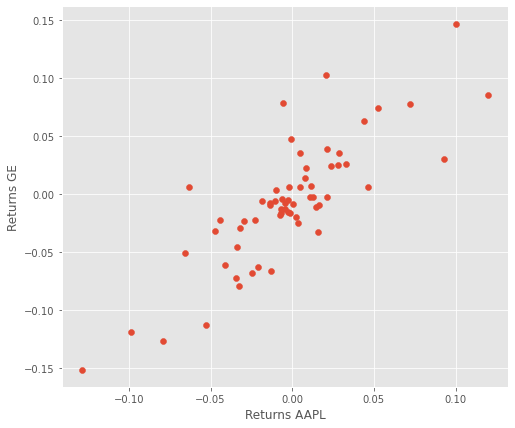

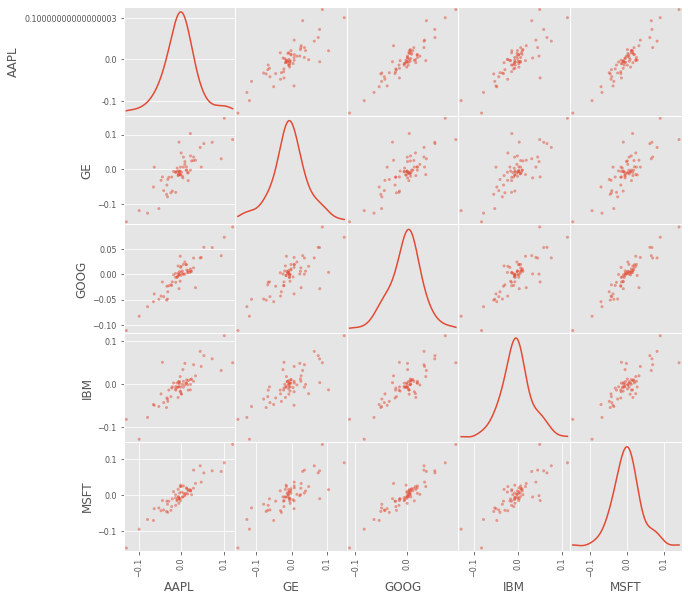

In [22]:
# Correlation Analysis — Does one competitor affect others?
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
print(corr)

plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel("Returns AAPL")
plt.ylabel("Returns GE")

pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

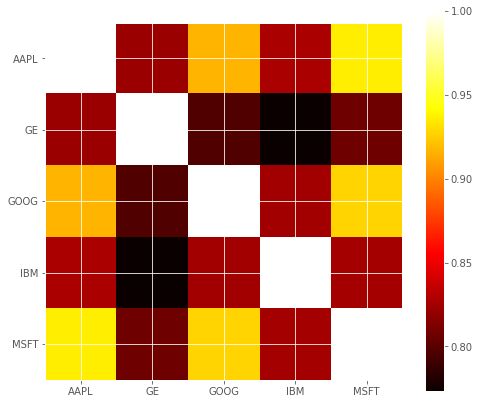

In [21]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

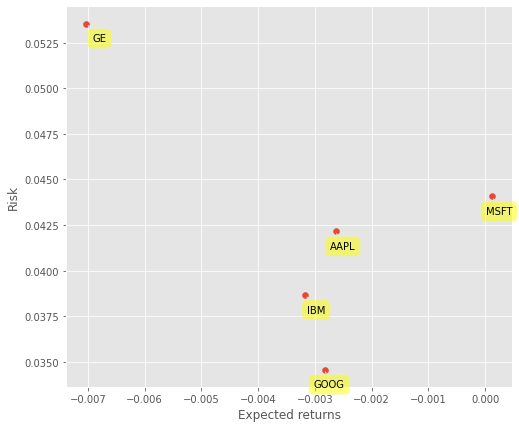

In [20]:
# Stocks Returns Rate and Risk
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [26]:
# Predicting Stocks Price
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

print(dfreg)

             Adj Close       Volume    HL_PCT  PCT_change
Date                                                     
2010-01-04   26.466835  123432400.0  0.990606    0.271752
2010-01-05   26.512596  150476200.0  1.091520   -0.102519
2010-01-06   26.090879  138040000.0  2.123523   -1.590633
2010-01-07   26.042646  119282800.0  1.400893   -0.552538
2010-01-08   26.215786  111902700.0  1.386924    0.798864
...                ...          ...       ...         ...
2020-01-06  298.282715   29596800.0  2.404934    2.045672
2020-01-07  296.879883   27218000.0  1.146145   -0.483585
2020-01-08  301.655548   33019800.0  2.401134    2.029209
2020-01-09  308.062988   42527100.0  1.366140    0.777898
2020-01-10  308.759399   35161200.0  1.424295   -0.086935

[2523 rows x 4 columns]
